<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Check the current working directory
import os
os.getcwd()

'C:\\Users\\nsk_z\\OneDrive\\Desktop\\Data Science and AI\\Week 4'

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_20680\2233048484.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)


In [4]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

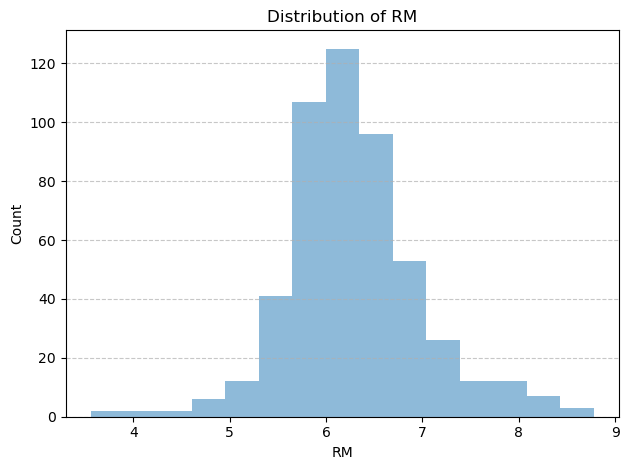

In [12]:
#  ANSWER
#Create Histogram for RM
data['RM'].plot.hist(
    bins = 15,
    alpha = 0.5,
    title = 'Distribution of RM',
    xlabel = 'RM',
    ylabel = 'Count'
)

#Display the plot
plt.grid(axis='y', linestyle = '--', alpha =0.7) # plot grid for easier reading
plt.tight_layout() # prevent labels from overlapping
plt.show()

##### 2. Plot Histogram of `MEDV`

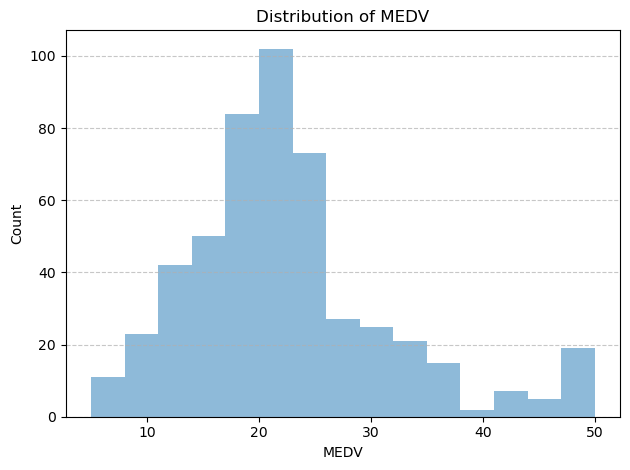

In [15]:
# ANSWER
#Create Histogram for MEDV
data['MEDV'].plot.hist(
    bins = 15,
    alpha = 0.5,
    title = 'Distribution of MEDV',
    xlabel = 'MEDV',
    ylabel = 'Count'
)

#Display the plot
plt.grid(axis='y', linestyle = '--', alpha =0.7) # plot grid for easier reading
plt.tight_layout() # prevent labels from overlapping
plt.show()

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

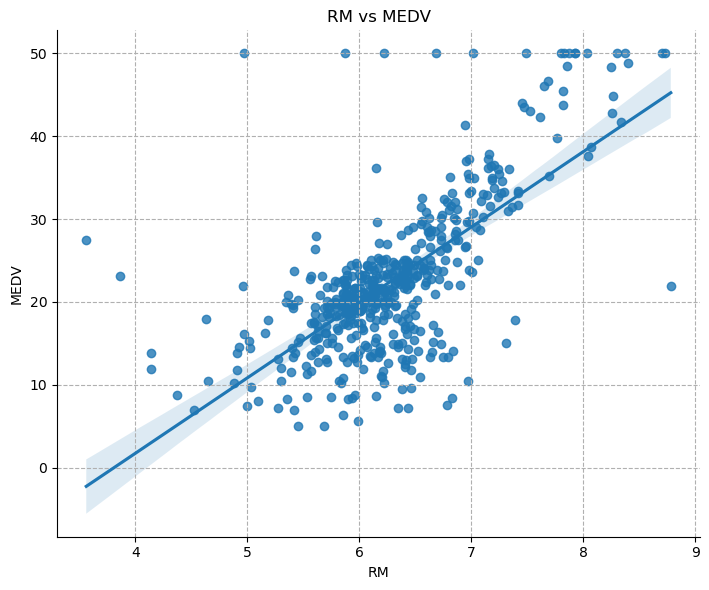

In [18]:
# ANSWER
# ANSWER
# Draw a Scatterplot showing RM and MEDV:
sns.lmplot(
    data = data,
    x = 'RM',
    y = 'MEDV',
    fit_reg = True, # Draw regression line
    height = 6, # height of the plot
    aspect = 1.2 # Aspect ratio
)

# Display the plot

plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True, linestyle = '--') # for easier read
plt.tight_layout() # prevent label overlapping
plt.show()


##### 3.B Is there any trend? State your observation.

**ANSWER:**: Yes, there is positive correlation between RM and MEDV.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, it is a large house. Otherwise the house is small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [26]:
# ANSWER
# Set alpha = 0.05
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [29]:
# ANSWER
# Set 2 dataset with 100 sample size
N=100
medv_large = data[data['RM'] >6]['MEDV'].sample(N, random_state =42)
medv_small = data[data['RM'] <=6]['MEDV'].sample(N, random_state =42)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_20680\1113145734.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(medv_large, label = "Large House", kde=False)
C:\Users\nsk_z\AppData\Local\Temp\ipykernel_20680\1113145734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medv_small, label =

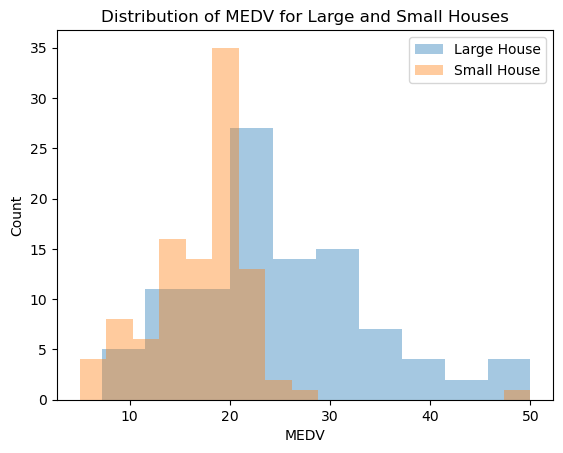

In [32]:
# ANSWER
# Histogram of Large House and Small house
ax = sns.distplot(medv_large, label = "Large House", kde=False)
sns.distplot(medv_small, label = "Small House", kde = False, ax=ax)
plt.legend(loc = "upper right")
plt.xlabel("MEDV")
plt.ylabel("Count")
plt.title('Distribution of MEDV for Large and Small Houses')
plt.show()


##### 7. Calculate Variance

Calculate variance for both samples.

In [36]:
# ANSWER
# Calculate the variance for both Large and small house
var_large = np.var(medv_large)
var_small = np.var(medv_small)
print(var_large)
print(var_small)

83.16813900000001
32.23845899999999


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [38]:
# ANSWER
## Calculate the Pooled Standard Deviation
std =np.sqrt((var_large+var_small)/2)
print(std)

7.596268755119187


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [42]:
# ANSWER
## Calculate the t-statistic
t = (medv_large.mean() - medv_small.mean()) / (std*np.sqrt(2*100))
print(t)

0.073165648547924


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [44]:
# ANSWER
degree_of_freedom = (100 + 100) - 2  #Total number of sample for medv_large and medv_small - 2

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [48]:
# ANSWER
import scipy.stats as stats
p_value = 1 - stats.t.cdf(abs(t), df = degree_of_freedom)
print('p=', str(2*p_value))
print('t=', str (t))

p= 0.9417481602346971
t= 0.073165648547924


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [50]:
null_hypothesis = {
    "H0": "There is no difference in the mean of prices between the large and small houses.",
    "H1": "There is a difference in the mean of prices between the large and small houses."
}

In [52]:
def print_hypotheses(p_value, alpha):
    '''
    inputs: p_value, alpha
    p_value: calculated p value
    alpha: Confident level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H1'])
    

In [54]:
# ANSWER
print_hypotheses(p_value, alpha)

We fail to reject our null hypothesis.
There is a difference in the mean of prices between the large and small houses.


In [ ]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [56]:
# ANSWER
# Calculate the t-test
def check_sig(p_value, alpha):
    '''
    input: p_value, alpha
    p_value: calucalated p_value
    alpha: confidence level
    returns: significant message
    '''
    str_result = ''
    if p_value < alpha :
        str_result = "We reject null hypothesis"
        str_result += "\n"
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail reject null hypothesis"
        str_result += "\n"
        str_result += null_hypothesis['H0']
    return str_result

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [58]:
# ANSWER
def ttest_ind(a,b, alpha = 0.05):
    '''
    inputs:
    a,b: the array must have the same shape
    alpha: value of alpha, set to default 0.05
    '''
    N = len(a)
    # calculate the variance
    var_a = np.var(a)
    var_b = np.var(b)

    # calculate the standard deviation
    std = np.sqrt((var_a + var_b)/2)
    t = (a.mean() - b.mean()) / (std*np.sqrt(2*N)) # t-statistic

    # calculate the degree of freedom
    df = 2*N - 2

    # calculate the p_value
    p = 1-stats.t.cdf(abs(t), df = df) # p-value

    # two tailed p-value
    p = p*2
    
    return t, p , check_sig(p, alpha)

In [60]:
t,p, sig = ttest_ind(medv_large, medv_small, alpha)
print("t:", str(t))
print("p:", str(p))
print(sig)

t: 0.073165648547924
p: 0.9417481602346971
We fail reject null hypothesis
There is no difference in the mean of prices between the large and small houses.


In [62]:
t2, p2 = stats.ttest_ind(medv_large, medv_small)
print("t:" , str(t2))
print("p:", str(p2))

t: 7.27989011329426
p: 7.686055825655334e-12




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



